In [4]:
import numpy as np
from test_estimate_distance_matrix import evaluate
from estimate_distance_matrix import distance_matrix_from_locs, estimate_distance_matrix
import matplotlib.pyplot as plt

In [2]:
n = 11
# fitted from dataset
params = (1.0, -46.123430636476016, 2.902844191159571, 3.9405315173088855, -100)
spring_params = (100, 0.2, 0.1, False)

true_locs = np.array([[1.0,7.0],[14.0,3.0],[3.0,19.0],[21.0,18.0],[9.0,33.0],[22.0,3.0],[10.0,11.0],[3.0,32.0],[27.0,27.0],[20.0,12.0],[18.0,34.0]])
true_locs = 0.3048*true_locs # convert to meters
true_dist_matrix = distance_matrix_from_locs(true_locs)

# This data comes from: http://anrg.usc.edu/www/download_files/RSSLocalizationDataSet_11nodes.txt
rss_matrix = np.array([[-100, -68.308, -62.299, -67.051, -68.141, -66.400, -60.864, -77.891, -68.217, -69.553, -68.678],
                [-67.414, -100, -68.205, -65.299, -69.623, -55.270, -59.656, -71.891, -69.178, -65.439, -74.507],
                [-60.025, -67.713, -100, -65.146, -64.812, -67.982, -58.420, -62.949, -70.291, -68.334, -69.354],
                [-68.820, -67.432, -67.988, -100, -68.111, -64.830, -65.680, -70.307, -56.207, -53.938, -67.278],
                [-66.090, -68.082, -64.801, -64.279, -100, -73.314, -63.975, -49.990, -62.357, -71.328, -54.147],
                [-67.572, -55.854, -70.355, -64.174, -77.715, -100, -77.591, -88.658, -68.432, -57.822, -73.303],
                [-62.527, -62.622, -62.680, -65.855, -68.123, -70.461, -100, -70.402, -73.127, -65.211, -79.361],
                [-77.521, -74.398, -65.662, -70.068, -50.838, -86.564, -70.062, -100, -70.560, -81.057, -67.722],
                [-68.896, -70.385, -72.194, -54.641, -63.342, -67.637, -70.941, -69.543, -100, -65.686, -63.720],
                [-66.488, -63.775, -66.978, -51.330, -69.295, -56.240, -63.301, -78.221, -65.041, -100, -70.042],
                [-72.078, -80.838, -73.341, -68.369, -57.963, -76.385, -79.549, -68.691, -66.980, -73.718, -100]])

print(true_dist_matrix)

[[ 0.    4.15  3.71  6.96  8.29  6.52  3.    7.64 10.    5.99  9.72]
 [ 4.15  0.    5.92  5.05  9.27  2.44  2.73  9.45  8.32  3.3   9.53]
 [ 3.71  5.92  0.    5.49  4.64  7.57  3.24  3.96  7.71  5.6   6.47]
 [ 6.96  5.05  5.49  0.    5.86  4.58  3.97  6.95  3.3   1.85  4.96]
 [ 8.29  9.27  4.64  5.86  0.    9.97  6.71  1.85  5.78  7.23  2.76]
 [ 6.52  2.44  7.57  4.58  9.97  0.    4.4  10.57  7.47  2.81  9.53]
 [ 3.    2.73  3.24  3.97  6.71  4.4   0.    6.75  7.12  3.06  7.42]
 [ 7.64  9.45  3.96  6.95  1.85 10.57  6.75  0.    7.47  8.    4.61]
 [10.    8.32  7.71  3.3   5.78  7.47  7.12  7.47  0.    5.05  3.48]
 [ 5.99  3.3   5.6   1.85  7.23  2.81  3.06  8.    5.05  0.    6.73]
 [ 9.72  9.53  6.47  4.96  2.76  9.53  7.42  4.61  3.48  6.73  0.  ]]


	converged in: 33 iterations
	converged in: 10 iterations


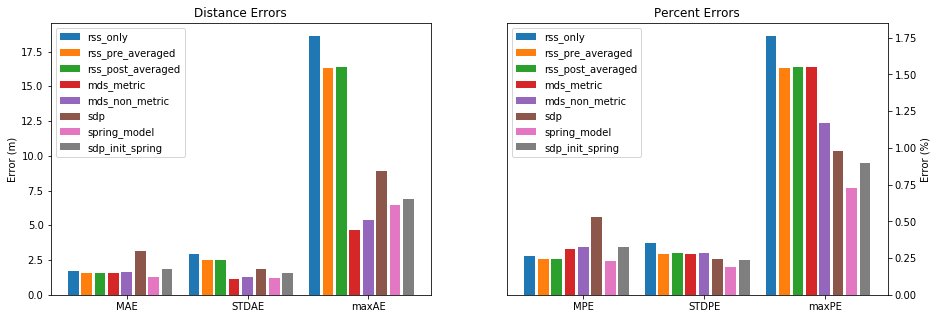

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
metrics1 = ["MAE", "STDAE", "maxAE"]
metrics2 = ["MPE", "STDPE", "maxPE"]
x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars
models = ["rss_only","rss_pre_averaged","rss_post_averaged","mds_metric","mds_non_metric","sdp","spring_model","sdp_init_spring"]
# models = ["rss_only","rss_pre_averaged","rss_post_averaged"]
x = x*(len(models)+1)

for i, model in enumerate(models):
    dist_matrix, est_locs, time_elapsed = estimate_distance_matrix(rss_matrix,use_model=model,estimate_distance_params=params,spring_model_params=spring_params)
    MAE, STDAE, maxAE, MPE, STDPE, maxPE, TP, FP, TN, FN, absolute_errors, percent_errors = evaluate(true_dist_matrix,dist_matrix)
    if False:
        print("Mean absolute error:",MAE)
        print("Std Dev absolute error:",STDAE)
        print("Max absolute error:",maxAE)
        print("Mean percent error:",MPE)
        print("Std Dev percent error:",STDPE)
        print("Max percent error:",maxPE)
        print("True positive:",TP)
        print("False positive:",FP)
        print("True negative:",TN)
        print("False negative:",FN)
        print("Time elapsed:",time_elapsed)
        print("Estimated distance matrix",model)
        print(dist_matrix)

    ax1.bar(x+i, [MAE, STDAE, maxAE], label=model)
    ax2.bar(x+i, [MPE, STDPE, maxPE], label=model)
        
##### ERROR PLOTS ###########
        
ax1.set_ylabel('Error (m)')
ax1.set_title('Distance Errors')
ax1.set_xticks(x+np.floor(len(models)/2))
ax1.set_xticklabels(metrics1)
ax1.legend()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel('Error (%)')
ax2.set_title('Percent Errors')
ax2.set_xticks(x+np.floor(len(models)/2))
ax2.set_xticklabels(metrics2)
ax2.legend()
# fig.tight_layout()
plt.show()